### Predict Daily Minimum Temperatures

### Goal
### Learn how to preprocess real time series data for RNNs.
### Compare a feedforward NN vs. an RNN on the same prediction task.
### Observe how the RNN learns temporal patterns and trends.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

In [2]:
# 1. Load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv'
df = pd.read_csv(url, parse_dates=['Date'])
df.set_index('Date', inplace=True)


In [3]:
# 2. Scale the “Temp” column to [0,1]
scaler = MinMaxScaler()
df['Temp'] = scaler.fit_transform(df[['Temp']])


In [4]:
# 3. Prepare sequences: use past `window_size` days to predict next day
def create_sequences(data, window_size=7):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i : i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

values = df['Temp'].values
window_size = 7
X, y = create_sequences(values, window_size=window_size)
# X shape: (N - window_size, window_size)
# y shape: (N - window_size, )

In [5]:
# 4. Train/test split (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# For RNN, reshape to (samples, timesteps, features)
X_train_rnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_rnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [6]:

# 5. Build feedforward model
ff_model = Sequential([
    Dense(64, activation='relu', input_shape=(window_size,)),
    Dense(32, activation='relu'),
    Dense(1)
])
ff_model.compile(optimizer='adam', loss='mse')
history_ff = ff_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

C:\Users\bbuser\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0493 - val_loss: 0.0090
Epoch 2/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0102 - val_loss: 0.0079
Epoch 3/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0093 - val_loss: 0.0074
Epoch 4/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0090 - val_loss: 0.0073
Epoch 5/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0090 - val_loss: 0.0072
Epoch 6/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0091 - val_loss: 0.0075
Epoch 7/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0091 - val_loss: 0.0074
Epoch 8/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0089 - val_loss: 0.0072
Epoch 9/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0089 - val_loss: 0.0079
Epoch 10/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0091 - val_loss: 0.0072
Epoch 11/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0089 - val_loss: 0.0074
Epoch 12/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0089 - val_l

In [8]:
# 6. Build RNN model (SimpleRNN)
rnn_model = Sequential([
    SimpleRNN(64, activation='tanh', input_shape=(window_size, 1)),
    Dense(1)
])
rnn_model.compile(optimizer='adam', loss='mse')
history_rnn = rnn_model.fit(
    X_train_rnn, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test_rnn, y_test),
    verbose=1
)

C:\Users\bbuser\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.0110 - val_loss: 0.0086
Epoch 2/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0096 - val_loss: 0.0073
Epoch 3/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0097 - val_loss: 0.0074
Epoch 4/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0092 - val_loss: 0.0074
Epoch 5/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0094 - val_loss: 0.0076
Epoch 6/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0093 - val_loss: 0.0075
Epoch 7/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0093 - val_loss: 0.0087
Epoch 8/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0093 - val_loss: 0.0074
Epoch 9/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0094 - val_loss: 0.0077
Epoch 10/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0093 - val_loss: 0.0073
Epoch 11/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0091 - val_loss: 0.0073
Epoch 12/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step  
Feedforward MSE: 0.007855957985836316
RNN MSE: 0.007528911843684896


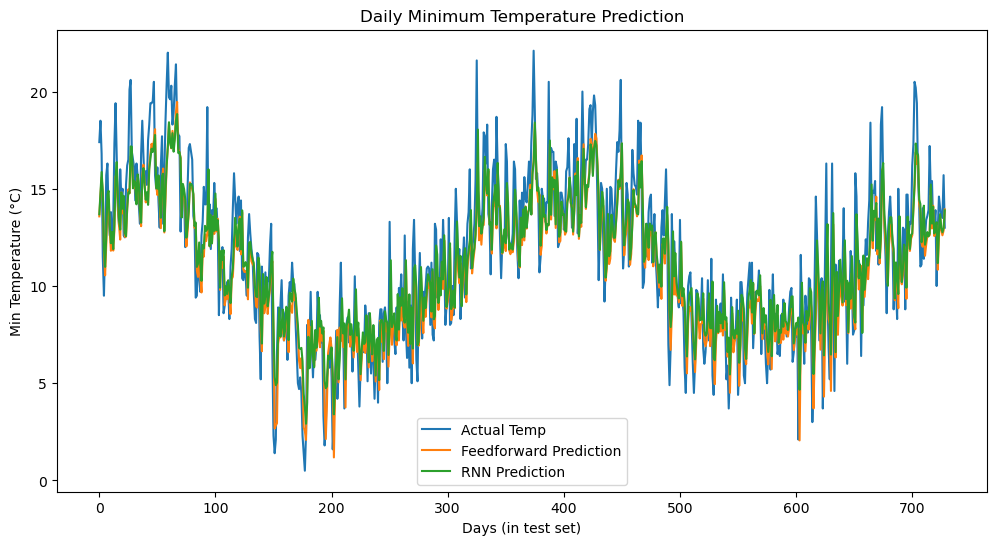

In [9]:
# 7. Evaluate models
ff_pred = ff_model.predict(X_test)
rnn_pred = rnn_model.predict(X_test_rnn)

ff_mse = mean_squared_error(y_test, ff_pred)
rnn_mse = mean_squared_error(y_test, rnn_pred)
print("Feedforward MSE:", ff_mse)
print("RNN MSE:", rnn_mse)

# 8. Rescale predictions & true values back to original temperatures
y_test_orig = scaler.inverse_transform(y_test.reshape(-1, 1))
ff_pred_orig = scaler.inverse_transform(ff_pred)
rnn_pred_orig = scaler.inverse_transform(rnn_pred)

# 9. Plot results
plt.figure(figsize=(12,6))
plt.plot(y_test_orig, label='Actual Temp')
plt.plot(ff_pred_orig, label='Feedforward Prediction')
plt.plot(rnn_pred_orig, label='RNN Prediction')
plt.title('Daily Minimum Temperature Prediction')
plt.xlabel('Days (in test set)')
plt.ylabel('Min Temperature (°C)')
plt.legend()
plt.show()

### Conclusion:

## Both models performed well (MSE values are close to zero).

## The RNN performed a bit better, meaning it captured the temporal (sequence) patterns in the data more effectively.

## If your data is time-dependent or sequential, this result confirms that RNN is more suitable than a simple Feedforward model.